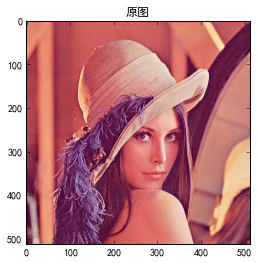

In [53]:
#!encoding=utf-8
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

font_name = "SIMHEI"
plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"]=False

"""
@author: luoxd
project: my matrix analysis project
"""
img = Image.open("lena_std.tif")
img_array = np.array(img, dtype=np.float)

min_img = np.min(img_array)
max_img = np.max(img_array)

img_norm = (img_array[:, :, 1] - min_img) / (max_img - min_img)
img_exp = np.exp(-img_norm)

plt.title(u"原图")
plt.imshow(img)
plt.show()

In [39]:
from PIL import ImageChops
def ImgOfffSet(Img,xoff,yoff):
    width, height = Img.size
    c = ImageChops.offset(Img,xoff,yoff)
    c.paste((0,0,0),(0,0,xoff,height))
    c.paste((0,0,0),(0,0,width,yoff))
    return c

In [71]:

plt.title(u"原图")
plt.imshow(img)
figure_fig1 = plt.gcf()  # 'get current figure'
figure_fig1.savefig(u'原图.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()

trans_x = ImgOfffSet(img, 50, 0)
plt.title(u"向右平移50个单位")
plt.imshow(trans_x)
figure_fig2 = plt.gcf()  # 'get current figure'
figure_fig2.savefig(u'向右平移.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()

trans_y = ImgOfffSet(img, 0, 50)
plt.title(u"向下平移50个单位")
plt.imshow(trans_y)
figure_fig3 = plt.gcf()  # 'get current figure'
figure_fig3.savefig(u'向下平移.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()

trans_both = ImgOfffSet(img, 50, 50)
plt.title(u"向下向左平移50个单位")
plt.imshow(trans_both)
figure_fig4 = plt.gcf()  # 'get current figure'
figure_fig4.savefig('同时平移.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()


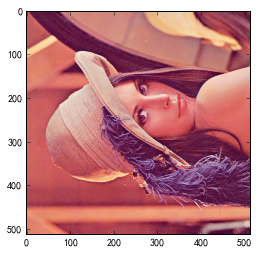

In [60]:
rotate1 = img.rotate(45)
plt.imshow(rotate)
plt.show()

(512, 512, 3)
(512, 512, 3)


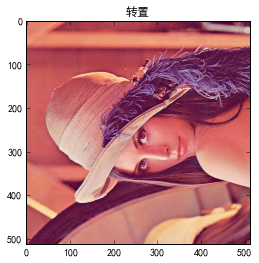

In [61]:
print(img_array.shape)
trans = np.zeros_like(img_array, dtype=np.uint)
for i in range(3):
    trans[:, :, i] = img_array[:, :, i].transpose(1, 0)
print(trans.shape)
plt.title(u"转置")
plt.imshow(trans)
figure_fig5 = plt.gcf()  # 'get current figure'
figure_fig5.savefig('转置.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()

(512, 512, 3)


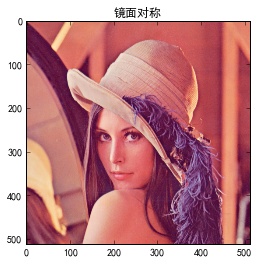

In [70]:

mirror = np.zeros_like(img_array, dtype=np.uint)
for i in range(3):
    mirror[:, :, i] = np.fliplr(img_array[:, :, i])
print(mirror.shape)
plt.title(u"镜面对称")
plt.imshow(mirror)
figure_fig6 = plt.gcf()  # 'get current figure'
figure_fig6.savefig('镜面对称.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()

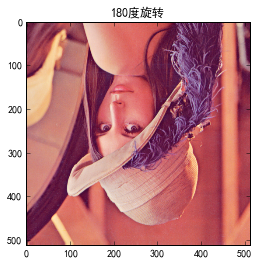

In [73]:
# rorate1 = img.rotate(45)
# plt.title(u"45度旋转")
# plt.imshow(rorate1)
# figure_fig7 = plt.gcf()  # 'get current figure'
# figure_fig7.savefig('45度旋转.jpg', bbox_inches = 'tight', dpi=1000)
# plt.show()

# rorate1 = img.rotate(90)
# plt.title(u"90度旋转")
# plt.imshow(rorate1)
# figure_fig8 = plt.gcf()  # 'get current figure'
# figure_fig8.savefig('90度旋转.jpg', bbox_inches = 'tight', dpi=1000)
# plt.show()

# rorate1 = img.rotate(300)
# plt.title(u"300度旋转")
# plt.imshow(rorate1)
# figure_fig9 = plt.gcf()  # 'get current figure'
# figure_fig9.savefig('300度旋转.jpg', bbox_inches = 'tight', dpi=1000)
# plt.show()

rorate1 = img.rotate(180)
plt.title(u"180度旋转")
plt.imshow(rorate1)
figure_fig9 = plt.gcf()  # 'get current figure'
figure_fig9.savefig('180度旋转.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()

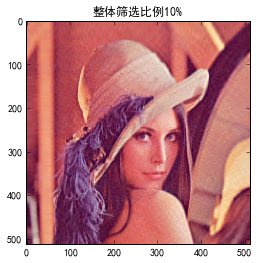

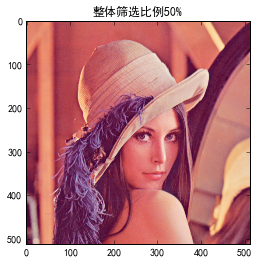

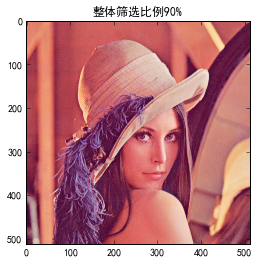

In [79]:
def svdimage(original,percent):
    R0=original[:,:,0]
    G0=original[:,:,1]
    B0=original[:,:,2]
    u0,sigma0,v0=np.linalg.svd(R0)
    u1,sigma1,v1=np.linalg.svd(G0)
    u2,sigma2,v2=np.linalg.svd(B0)
    R1=np.zeros(R0.shape)
    G1=np.zeros(G0.shape)
    B1=np.zeros(B0.shape)
    for i in range(int(percent*len(sigma0))+1):
        R1+=sigma0[i]*np.dot(u0[:,i].reshape(-1,1),v0[i,:].reshape(1,-1))
    for i in range(int(percent*len(sigma1))+1):
        G1+=sigma1[i]*np.dot(u1[:,i].reshape(-1,1),v1[i,:].reshape(1,-1))
    for i in range(int(percent*len(sigma2))+1):
        B1+=sigma2[i]*np.dot(u2[:,i].reshape(-1,1),v2[i,:].reshape(1,-1))
    final=np.stack((R1,G1,B1),2)
    final[final>255]=255
    final[final<0]=0
    final=np.rint(final).astype('uint8')
    return final

precent10 = svdimage(img_array, 0.1)
plt.title(u"整体筛选比例10%")
plt.imshow(precent10)
figure_fig9 = plt.gcf()  # 'get current figure'
figure_fig9.savefig('整体筛选比例10%.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()

precent50 = svdimage(img_array, 0.5)
plt.title(u"整体筛选比例50%")
plt.imshow(precent50)
figure_fig10 = plt.gcf()  # 'get current figure'
figure_fig10.savefig('整体筛选比例50%.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()

precent90 = svdimage(img_array, 0.9)
plt.title(u"整体筛选比例90%")
plt.imshow(precent90)
figure_fig11 = plt.gcf()  # 'get current figure'
figure_fig11.savefig('整体筛选比例90%.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()

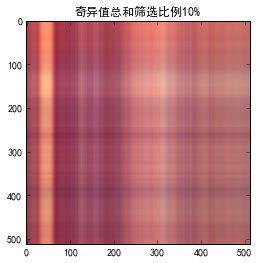

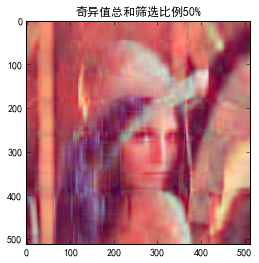

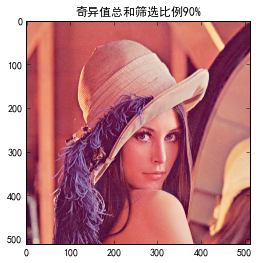

In [80]:
def svdimage_all(original,percent):
    R0=original[:,:,0]
    G0=original[:,:,1]
    B0=original[:,:,2]
    u0,sigma0,v0=np.linalg.svd(R0)
    u1,sigma1,v1=np.linalg.svd(G0)
    u2,sigma2,v2=np.linalg.svd(B0)
    R1=np.zeros(R0.shape)
    G1=np.zeros(G0.shape)
    B1=np.zeros(B0.shape)
    total0=sum(sigma0)
    total1=sum(sigma1)
    total2=sum(sigma2)
    sd=0
    for i,sigma in enumerate(sigma0):
        R1+=sigma*np.dot(u0[:,i].reshape(-1,1),v0[i,:].reshape(1,-1))
        sd+=sigma
        if sd>=percent*total0:
            break
    sd=0
    for i,sigma in enumerate(sigma1):
        G1+=sigma*np.dot(u1[:,i].reshape(-1,1),v1[i,:].reshape(1,-1))
        sd+=sigma
        if sd>=percent*total1:
            break
    sd=0
    for i,sigma in enumerate(sigma2):
        B1+=sigma*np.dot(u2[:,i].reshape(-1,1),v2[i,:].reshape(1,-1))
        sd+=sigma
        if sd>=percent*total2:
            break
    final=np.stack((R1,G1,B1),2)
    final[final>255]=255
    final[final<0]=0
    final=np.rint(final).astype('uint8')
    return final

precent1 = svdimage_all(img_array, 0.1)
plt.title(u"奇异值总和筛选比例10%")
plt.imshow(precent1)
figure_fig12 = plt.gcf()  # 'get current figure'
figure_fig12.savefig('奇异值总和筛选比例10%.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()

precent5 = svdimage_all(img_array, 0.5)
plt.title(u"奇异值总和筛选比例50%")
plt.imshow(precent5)
figure_fig13 = plt.gcf()  # 'get current figure'
figure_fig13.savefig('奇异值总和筛选比例50%.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()

precent9 = svdimage_all(img_array, 0.9)
plt.title(u"奇异值总和筛选比例90%")
plt.imshow(precent9)
figure_fig14 = plt.gcf()  # 'get current figure'
figure_fig14.savefig('奇异值总和筛选比例90%.jpg', bbox_inches = 'tight', dpi=1000)
plt.show()